In [1]:
import json
import networkx as nx
import pandas as pd
import numpy as np

In [ ]:
with open ('../data/proposals/aave/aave_snapshot_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_votes = json.load(file)
    
with open ('../data/proposals/aave/aave_snapshot_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_proposals = json.load(file)['data']['proposals']
    
with open ('../data/proposals/aave/aave_v2_on_chain_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_v2_proposals = json.load(file)['data']['proposals']
    
with open ('../data/proposals/aave/aave_v2_on_chain_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_v2_votes = json.load(file)
    
with open ('../data/proposals/aave/aave_v3_on_chain_proposals_1_year.json', 'r', encoding='utf8') as file:
    aave_v3_proposals = json.load(file)['data']['proposals']
    
with open ('../data/proposals/aave/aave_v3_on_chain_votes_1_year.json', 'r', encoding='utf8') as file:
    aave_v3_votes = json.load(file)

In [5]:
coin_keywords = ['USDC', 'USDT', 'WETH']
chain_keywords = ['Arbitrum', 'Base', 'Optimism', 'Polygon', 'Mainnet']

In [ ]:
for proposal in aave_proposals:
    if all(any(word in proposal['title'] for word in words) for words in [coin_keywords, chain_keywords]):
        print(proposal['title'])

In [12]:
G = nx.Graph()

proposer_nodes = []
voter_nodes = []

for proposal in aave_proposals:
    proposer = proposal['author']
    if proposer not in proposer_nodes:
        proposer_nodes.append(proposer)
    
    for voting in aave_votes:
        if voting['proposal_id'] == proposal['id']:
            for vote in voting['votes']:
                voter = vote['voter']
                if voter not in voter_nodes:
                    voter_nodes.append(voter)

In [13]:
G.add_nodes_from(proposer_nodes, bipartite=0)
G.add_nodes_from(voter_nodes, bipartite=1)

In [15]:
for proposal in aave_proposals:
    proposer = proposal['author']
    
    for voting in aave_votes:
        if voting['proposal_id'] == proposal['id']:
            for voter in voting['votes']:
                G.add_edge(proposer, voter['voter'])

In [17]:
nx.is_bipartite(G)

False

In [3]:
G = nx.Graph()

for proposal in aave_proposals:
    G.add_node(proposal['author'])
    
    for voting in aave_votes:
        if voting['proposal_id'] == proposal['id']:
            for voter in voting['votes']:
                G.add_node(voter['voter'])
                G.add_edge(proposal['author'], voter['voter'])

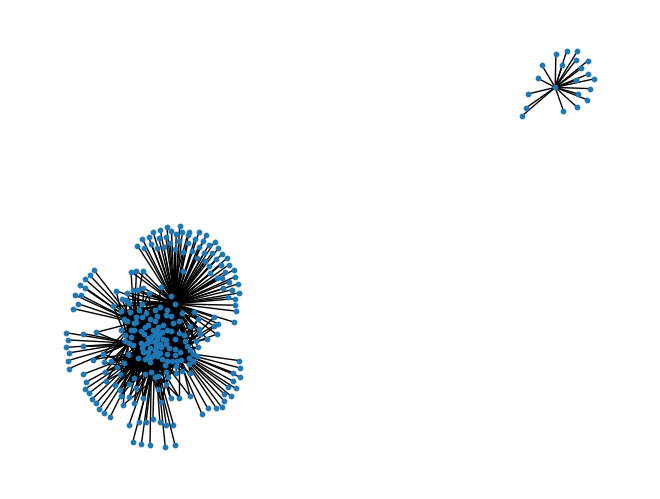

In [22]:
nx.draw(G, node_size=10)

In [24]:
sorted_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [ ]:
# transfers_df = pd.read_csv('../data/1_year/combined_transfers_1_year.csv')
addresses_df = pd.read_csv('../data/1_year/distinct_addresses_1_year.csv')

In [18]:
addresses = addresses_df.values

In [19]:
intersection = np.intersect1d(addresses_df['address'].tolist(), list(G.nodes))

In [ ]:
for proposal in aave_proposals:
    id = proposal['id']
    try:
        if proposal['scores'][0] > proposal['scores'][1] and proposal['scores'][0] > proposal['scores'][2]:
            continue
        else:
            print(id, proposal['title'])
    except (IndexError):
        print(f'Failed: {id}')